<a href="https://www.kaggle.com/code/tonyagi/linear-regression-realestate-price-predictor?scriptVersionId=139355655" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-for-practicing-linear-regression/train.csv
/kaggle/input/dataset-for-practicing-linear-regression/test.csv
/kaggle/input/real-estate-price-prediction/Real estate.csv


In [2]:
df = pd.read_csv('/kaggle/input/real-estate-price-prediction/Real estate.csv')
df.head()



,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 8)

In [4]:
df.drop('No',inplace= True, axis= 1)

In [5]:
df.shape

(414, 7)

In [6]:
df.columns.values

array(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'], dtype=object)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import preprocessing

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

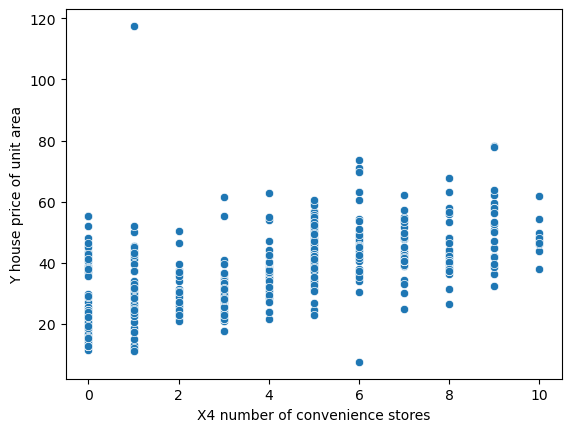

In [8]:
#Step 3: Create a scatterplot to visualize the data
sns.scatterplot(x='X4 number of convenience stores',
                y='Y house price of unit area', data= df)

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

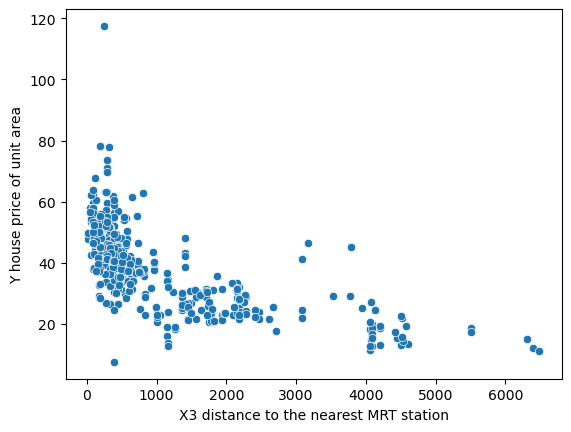

In [9]:
# Step 3b addition----univariate analysis vs Price of Unit Area---->
sns.scatterplot(x = 'X3 distance to the nearest MRT station', 
               y='Y house price of unit area', data = df)


<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

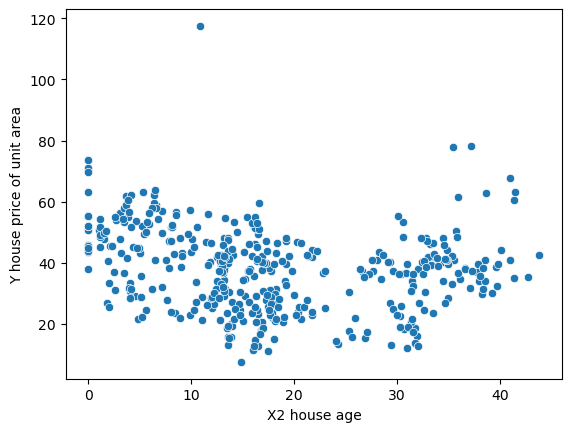

In [10]:
# 'X2 house age'
sns.scatterplot(x = 'X2 house age', y='Y house price of unit area',data = df)

In [11]:
#creating a feature variables
X= df.drop('Y house price of unit area',axis= 1)
y= df['Y house price of unit area']

In [12]:
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [13]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

**Split data into train and test sets:**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 3)

**Create a linear regression model**

In [15]:
lr = LinearRegression()

**Fit the model with training data.**

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

**Make predictions on the test data set.******

In [17]:
predictions = lr.predict(X_test)

**Evaluate the model with metrics.**

In [18]:
print("MAE", mean_absolute_error(y_test,predictions))
print("MSE", mean_squared_error(y_test,predictions))
print("R2 score", r2_score(y_test,predictions))

MAE 6.807725019946865
MSE 76.552881911511
R2 score 0.6056152725843047
